<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_no_supervisados/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Author: [Adonai Vera](https://www.linkedin.com/in/adonai-vera/) & [Jose Bohorquez](https://www.linkedin.com/in/jos%C3%A9-daniel-boh%C3%B3rquez-guerra-5bba281b3/)

## Clustering (Agrupaciones)

La idea principal detrás del agrupamiento es bastante directa. Básicamente, nos decimos a nosotros mismos: "Tengo estos puntos aquí, y puedo ver que se organizan en grupos. Sería bueno describir estas cosas de manera más concreta y, cuando llegue un nuevo punto, asignarlo al grupo correcto". Esta idea general fomenta la exploración y abre una variedad de algoritmos para el agrupamiento.

<figure><img align="center" src="https://habrastorage.org/getpro/habr/post_images/8b9/ae5/586/8b9ae55861f22a2809e8b3a00ef815ad.png"><figcaption>*Los ejemplos de los resultados de diferentes algoritmos de scikit-learn.*</figcaption></figure>

Los algoritmos enumerados a continuación no cubren todos los métodos de agrupamiento disponibles, pero son los más comúnmente utilizados.

### K-means

El algoritmo K-means es el más popular y, sin embargo, el más simple de todos los algoritmos de agrupamiento. Así es cómo funciona:

1. Selecciona el número de clústeres "Agrupaciones" $k$ que crees que es el número óptimo.
2. Inicializa $k$ puntos como "centroides" de forma aleatoria dentro del espacio de nuestros datos.
3. Atribuye cada observación a su centroide más cercano.
4. Actualiza los centroides al centro de todos los conjuntos atribuidos en las observaciones.
5. Repite los pasos 3 y 4 un número fijo de veces o hasta que todos los centroides sean estables (es decir, ya no cambien en el paso 4).

Este algoritmo es fácil de describir y visualizar.  

#### Ejemplo 1

Crearemos un conjunto de datos sintéticos para demostrar el funcionamiento del algoritmo K-means con base en la para teórica de este concepto. Echemos un vistazo:

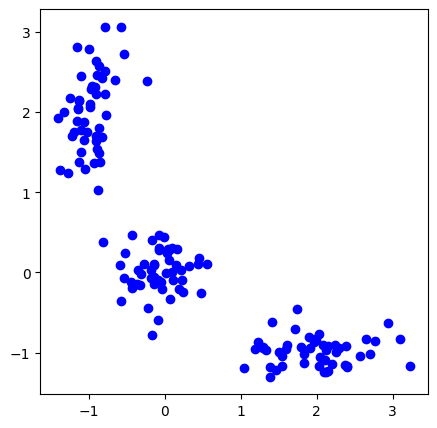

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's begin by allocation 3 cluster's points
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

Se generan tres grupos de puntos, cada uno con una distribución específica en el plano xy. Luego, se visualizan estos puntos en un gráfico de dispersión.

Veamos el código:

- Se importan las bibliotecas necesarias: `NumPy` para el manejo de matrices y `matplotlib.pyplot` para la visualización de datos.

- Se inicializa una matriz `X` de tamaño (150, 2) para almacenar las coordenadas de los puntos de datos. Todos los elementos de la matriz se establecen inicialmente en cero.

- Se generan los puntos de datos para los tres clusters:

- Los primeros 50 puntos se generan aleatoriamente con una distribución normal centrada en (0, 0) y una desviación estándar de 0.3 tanto en x como en y.

- Los siguientes 50 puntos se generan con una distribución normal centrada en (2, -1) y desviaciones estándar de 0.5 y 0.2 en x e y, respectivamente.

- Los últimos 50 puntos se generan con una distribución normal centrada en (-1, 2) y desviaciones estándar de 0.2 y 0.5 en x e y, respectivamente.

- Se trazan los puntos de datos en un gráfico de dispersión utilizando `plt.plot()`. Los puntos se representan como puntos azules ('bo') en el gráfico.



In [ ]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)

    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

Asignaremos puntos a clusters y actualizar las posiciones de los centroides iterativamente. Se utilizan las funciones de la biblioteca Scipy para calcular distancias y asignar puntos a los centroides más cercanos.

Veamos cómo funciona:

- Se importa la función `cdist` de la biblioteca `scipy.spatial.distance`, que se utiliza para calcular la distancia entre dos conjuntos de puntos.

- Se inicializa un arreglo centroids de tamaño (3, 2) para almacenar las coordenadas de los centroides. Los centroides se generan aleatoriamente con una distribución normal centrada en 0.0 y una desviación estándar de 1.0.

- Se guarda el primer conjunto de centroides en una lista `cent_history`.

- Se realiza un bucle `for` que se ejecuta tres veces para actualizar los centroides:

- Se calcula la matriz de distancias entre cada punto de datos y los centroides actuales utilizando la función `cdist`.

- Se determina el índice del centroide más cercano para cada punto utilizando `argmin` en el eje 1 de la matriz de distancias.

- Se actualizan las coordenadas de los centroides asignándoles la media de las coordenadas de los puntos asignados a cada centroide.

- Se añaden los nuevos centroides a la lista `cent_history` para su seguimiento.


Ahora veremos cómo se actualizan los centroides en cada iteración del algoritmo K-means para mejorar la asignación de puntos a clusters. La lista cent_history permite visualizar cómo cambian los centroides en cada paso del algoritmo.

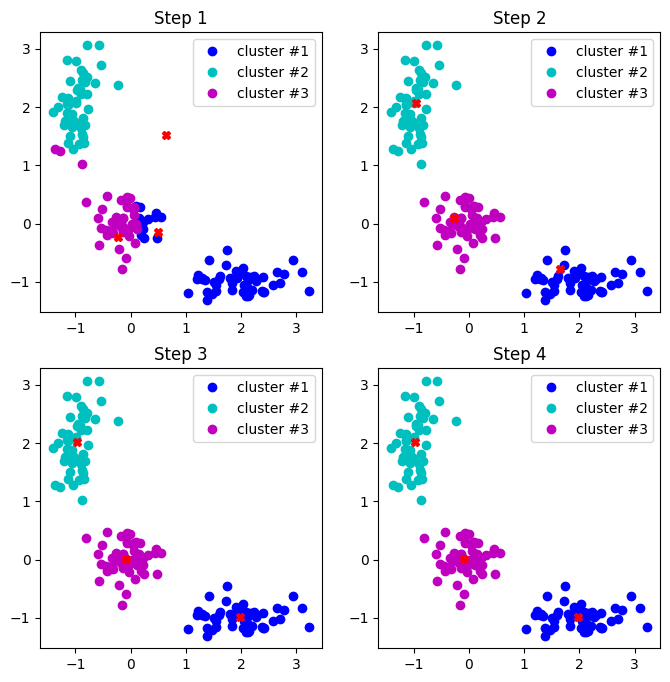

In [ ]:
# Let's plot K-means
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

Veamos lo que acabamos de ejecutar:

- Se crea una figura de tamaño (8, 8) utilizando `plt.figure(figsize=(8, 8))`.

- Se realiza un bucle for que itera cuatro veces, representando cuatro pasos del algoritmo K-means.

- Dentro del bucle, se calculan las distancias entre los puntos de datos y los centroides en el `i-ésimo` paso utilizando la función `cdist`.

- Se determinan las etiquetas de cluster para cada punto utilizando `argmin` en el eje 1 de la matriz de distancias.

- Se utilizan las funciones de trazado de Matplotlib para graficar los puntos de cada cluster con diferentes colores y marcadores:
    - Los puntos del primer cluster se representan en azul (`'bo'`).
    - Los puntos del segundo cluster se representan en cian (`'co'`).
    - Los puntos del tercer cluster se representan en magenta (`'mo'`).

- Los centroides se representan como `'X'` rojos (`'rX'`).

- Se añade una leyenda para identificar los clusters y los centroides.

- Se asigna un título a cada subfigura para indicar el paso del algoritmo representado.


Aquí, usamos la distancia euclidiana, pero el algoritmo convergerá con cualquier otra métrica. No solo puedes variar el número de pasos o los criterios de convergencia, sino también la medida de distancia entre los puntos y los centroides de los clústeres.

Otra "característica" de este algoritmo es su sensibilidad a las posiciones iniciales de los centroides de los clústeres. Puedes ejecutar el algoritmo varias veces y luego promediar todos los resultados de los centroides.

### Eligiendo el número de agrupaciones para K-means

A diferencia de las tareas de aprendizaje supervisado como la clasificación y la regresión, el agrupamiento requiere más esfuerzo para elegir el criterio de optimización. Por lo general, cuando trabajamos con k-means, optimizamos la suma de las distancias al cuadrado entre las observaciones y sus centroides.

$$\Large J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

Donde $C$ es un conjunto de clústeres con potencia $K$, $\mu_k$ es un centroide de un clúster $C_k$.

Esta definición parece razonable -- queremos que nuestras observaciones estén lo más cerca posible de sus centroides. Pero, hay un problema -- el óptimo se alcanza cuando el número de centroides es igual al número de observaciones, por lo que terminarías con cada observación como su propio clúster separado.

Para evitar ese caso, deberíamos elegir un número de clústeres después del cual una función $J(C_k)$ disminuya menos rápidamente. Más formalmente,
$$\Large D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

Veamos un ejemplo.

### Ejemplo 2

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))


d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\PROYECTO DIVERSIFICACION DE 

- Se importa la clase KMeans del módulo `sklearn.cluster`.

- Se inicializa una lista vacía llamada inertia para almacenar los valores de la inercia para cada número de clusters.

- Se realiza un bucle for que itera desde 1 hasta 7 (el rango es hasta 8 pero excluyendo el último elemento).

- Dentro del bucle, se instancia un objeto KMeans con el número actual de clusters (`k`) y un valor de semilla aleatorio fijo (`random_state=1`).

- Se ajusta el modelo KMeans a los datos `X` utilizando el método `fit`.

- Se calcula la raíz cuadrada de la inercia (suma de las distancias al cuadrado de cada punto al centroide más cercano) y se agrega a la lista inertia.

La inercia es una medida de cómo los puntos están dispersos alrededor de los centroides de los clusters. Se utiliza para evaluar la calidad de los clusters en el algoritmo K-means. Al aumentar el número de clusters, generalmente la inercia disminuye, ya que los centroides se ajustan mejor a los puntos. Sin embargo, llega un punto en el que agregar más clusters no mejora significativamente la inercia.

Este análisis se utiliza para determinar el "codo" en el gráfico de inercia vs. número de clusters, lo que indica el número óptimo de clusters para el conjunto de datos.

Text(0, 0.5, '$J(C_k)$')

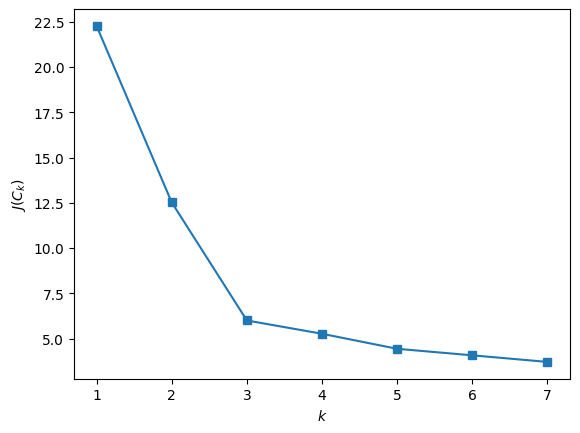

In [ ]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

- Se utiliza la función plot de Matplotlib para trazar la inercia en función del número de clusters.

- El eje x representa el número de clusters (`k`), que va desde 1 hasta 7.

- El eje y representa la inercia (`J(Ck)`), que es la suma de las distancias al cuadrado de cada punto al centroide más cercano.

- Se utiliza el marcador `'s'` (cuadrado) para resaltar los puntos en la gráfica.

Vemos que $J(C_k)$ disminuye significativamente hasta que el número de clústeres es 3 y luego ya no cambia tanto. Esto significa que el número óptimo de clústeres es 3.

##### ¿Por qué 3?
El número óptimo de clusters se elige típicamente observando el codo en la curva de la inercia. En este caso, el codo en la curva de inercia se encuentra alrededor de k=3, lo que sugiere que agregar más clusters después de este punto no proporcionaría una mejora significativa en la inercia.

El codo en la curva de la inercia indica el punto donde se produce una disminución significativamente más lenta en la inercia a medida que aumenta el número de clusters. Esto sugiere que agregar más clusters no proporcionará una mejora significativa en la compacidad de los clusters.

Sin embargo, la elección del número óptimo de clusters también puede depender del contexto del problema y de otros factores, como el conocimiento experto o los requisitos específicos del negocio. En algunos casos, puede ser necesario ajustar el número de clusters basado en el análisis adicional de los resultados.

### Desafíos

En esencia, K-means es NP-duro. Para $d$ dimensiones, $k$ clústeres y $n$ observaciones, encontraremos una solución en $O(n^{d k+1})$ en tiempo. Hay algunas heurísticas para lidiar con esto; un ejemplo es MiniBatch K-means, que toma porciones (lotes) de datos en lugar de ajustar todo el conjunto de datos y luego mueve los centroides tomando el promedio de los pasos anteriores. Compare la implementación de K-means y MiniBatch K-means en la [Documentacion sckit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html).

La [implementacion](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) del algoritmo usando `scikit-learn` tiene sus beneficios, como la posibilidad de establecer el número de inicializaciones con el parámetro de la función `n_init`, lo que nos permite identificar centroides más robustos. Además, estas ejecuciones pueden realizarse en paralelo para disminuir el tiempo de cálculo.

## Clustering Aglomerativo o Agrupamiento Aglomerativo


El siguiente algoritmo es el más simple y fácil de entender entre todos los algoritmos de agrupamiento sin un número fijo de clústeres.


El algoritmo es bastante simple:

1. Comenzamos asignando cada observación a su propio clúster.
2. Luego ordenamos las distancias entre pares de los centros de clústeres en orden descendente.
3. Tomamos los dos clústeres vecinos más cercanos y los fusionamos, y recalculamos los centros.
4. Repetimos los pasos 2 y 3 hasta que todos los datos se fusionen en un solo clúster.

El proceso de búsqueda del clúster más cercano se puede realizar con diferentes métodos de delimitación de las observaciones:
1. Enlace simple
$d(C_i, C_j) = min_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$
2. Enlace completo
$d(C_i, C_j) = max_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$
3. Enlace promedio
$d(C_i, C_j) = \frac{1}{n_i n_j} \sum_{x_i \in C_i} \sum_{x_j \in C_j} ||x_i - x_j||$
4. Enlace del centroide
$d(C_i, C_j) = ||\mu_i - \mu_j||$

El tercero es el más efectivo en tiempo de computación ya que no requiere recalcular las distancias cada vez que se fusionan los clústeres.

Los resultados pueden visualizarse como un hermoso árbol de clústeres (dendrograma) para ayudar a reconocer el momento en que se debe detener el algoritmo para obtener resultados óptimos. Hay muchas herramientas en Python para construir estos dendrogramas para el agrupamiento aglomerativo.

### Ejemplo 3

Consideremos un ejemplo con los clústeres que obtuvimos de K-means:

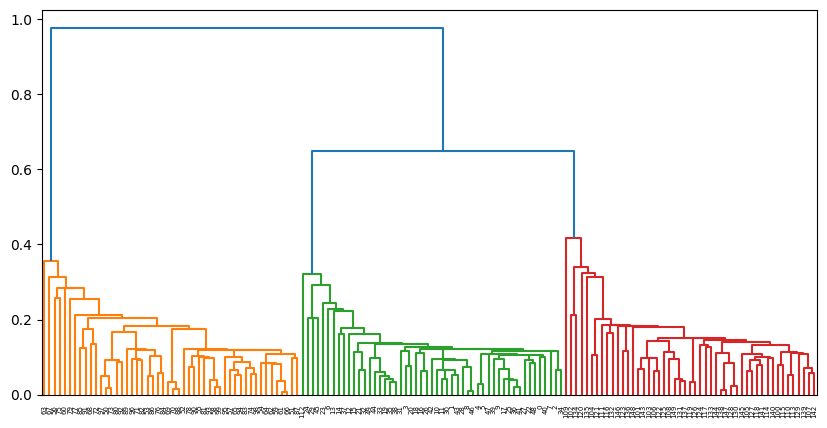

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X)
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

Detalles del código:

- Generación de datos sintéticos: Se generan datos sintéticos distribuidos en tres grupos en el plano 2D utilizando la función `numpy.random.normal`. Estos son los mismos datos del ejemplo anterior.

- Cálculo de la matriz de distancias: La función `pdist` de la biblioteca scipy se utiliza para calcular la matriz de distancias euclidianas entre pares de puntos en el conjunto de datos. Esta matriz contiene las distancias entre cada par de puntos en el conjunto de datos.

- Clustering aglomerativo: Se utiliza la función `linkage` para calcular los enlaces entre los clusters. Se pasa la matriz de distancias y el método de enlace `'single'`, que especifica el método de enlace para calcular la distancia entre los nuevos clusters.

- Visualización del dendrograma: Se utiliza la función `dendrogram` para visualizar el dendrograma resultante del clustering aglomerativo. Un dendrograma es un diagrama de árbol que muestra la agrupación jerárquica de los datos. El parámetro `color_threshold` se utiliza para definir el umbral de color para la línea horizontal que indica dónde se deben unir los clusters.

#### ¿Qué inferimos de los datos?

- Distribución de los datos: Los datos generados muestran una distribución en tres grupos distintos, lo que sugiere la presencia de tres clusters subyacentes en los datos.

- Proceso de agrupamiento: El dendrograma generado muestra cómo los puntos de datos se agrupan gradualmente a medida que se aumenta el umbral de distancia. Esto proporciona una visualización útil del proceso de agrupamiento y cómo los grupos se fusionan a diferentes niveles de similitud.

- Elección del número de clusters: La elección del número de clusters en el clustering aglomerativo puede requerir una interpretación subjetiva. En el dendrograma, los cortes donde las distancias entre los grupos comienzan a aumentar significativamente pueden indicar puntos donde los grupos se fusionan en clusters más grandes. En este ejemplo, un umbral de distancia de 0.5 se utilizó como referencia para identificar los clusters.

Para entender el umbral de distancia podemos imaginarnos el trazar una linea perpendicular al eje Y en el valor de 0.5, y por este motivo podriamos el numero de clusteres a elegir seria 3. En este caso la linea imageniria que trazamos en el valor de 0.5, produce tres intersecciones y por este motivo se pintan de color azul.

Veamos que sucede si cambiamos dicho valor por 0.4:

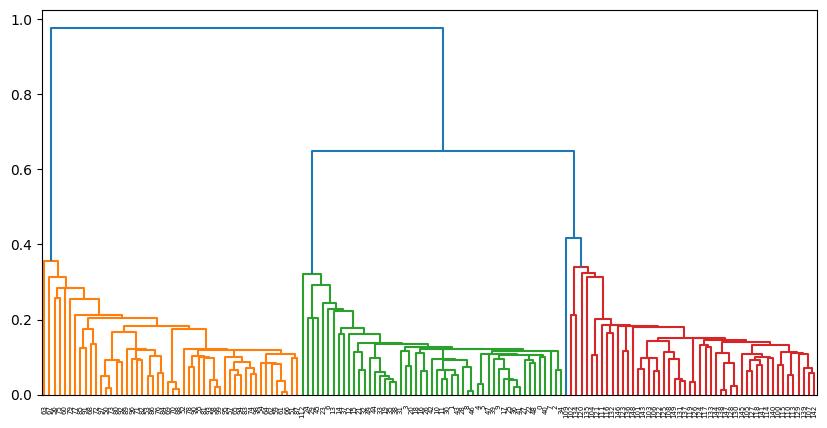

In [ ]:
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.4)

Vemos que ahora estariamos teniendo en cuenta cuatro agrupaciones dado que la linea imaginaria que trazariamos tendria 4 intersecciones y por este motivo se pintan de color azul 4 lineas.

## Métricas de Presición

A diferencia de la clasificación, es difícil evaluar la calidad de los resultados del agrupamiento. Aquí, una métrica no puede depender de las etiquetas sino solo de la calidad de la división. En segundo lugar, generalmente no tenemos las etiquetas verdaderas de las observaciones cuando usamos el agrupamiento.

Hay métricas de bondad interna y externa. Las métricas externas utilizan la información sobre la división verdadera conocida mientras que las métricas internas no utilizan ninguna información externa y evalúan la bondad de los clústeres basándose solo en los datos iniciales. El número óptimo de clústeres generalmente se define con respecto a algunas métricas internas.

Todas las métricas descritas a continuación están implementadas en `sklearn.metrics`.

**Índice de Rand Ajustado (ARI)**

Aquí, asumimos que las etiquetas verdaderas de los objetos son conocidas. Esta métrica no depende de los valores de las etiquetas, sino de la división de los clústeres de los datos. Sea $N$ el número de observaciones en una muestra. Sea $a$ el número de pares de observaciones con las mismas etiquetas y ubicadas en el mismo clúster, y sea $b$ el número de observaciones con diferentes etiquetas y ubicadas en diferentes clústeres. El Índice Rand se puede calcular usando la siguiente fórmula:

$$\Large \text{RI} = \frac{2(a + b)}{n(n-1)}.$$

En otras palabras, evalúa la proporción de observaciones para las cuales estas divisiones (inicial y el resultado de agrupamiento) son consistentes. El Índice Rand (RI) evalúa la similitud de las dos divisiones de la misma muestra. Para que este índice esté cerca de cero para cualquier resultado de agrupamiento con cualquier $n$ y número de clústeres, es esencial escalarlo, de ahí el Índice Rand Ajustado:

$$\Large \text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Esta métrica es simétrica y no depende de la permutación de las etiquetas. Por lo tanto, este índice es una medida de las distancias entre diferentes divisiones de muestras. $\text{ARI}$ toma valores en el rango $[-1, 1]$. Los valores negativos indican la independencia de las divisiones, y los valores positivos indican que las divisiones son consistentes (coinciden cuando $\text{ARI} = 1$).

**Información Mutua Ajustada (AMI)**

This metric is similar to $\text{ARI}$. It is also symmetric and does not depend on the labels values and permutation. Está definida por la función de [entropía](https://en.wikipedia.org/wiki/Entropy_(information_theory) e interpreta una división de muestra como una distribución discreta (la probabilidad de asignar a un clúster es igual al porcentaje de objetos en él). El índice $MI$ está definido como la [información mutua](https://en.wikipedia.org/wiki/Mutual_information) para dos distribuciones, correspondientes a la división de muestra en clústeres. Intuitivamente, la información mutua mide la proporción de información común para ambas divisiones de agrupamiento, es decir, cuánto la información sobre una de ellas disminuye la incertidumbre sobre la otra.

Al igual que con el $\text{ARI}$, se define el $\text{AMI}$. Esto nos permite deshacernos del aumento del índice $MI$ con el número de clústeres. El $\text{AMI}$ está en el rango $[0, 1]$. Los valores cercanos a cero significan que las divisiones son independientes, y los cercanos a 1 significan que son similares (con coincidencia completa en $\text{AMI} = 1$).

**Homogeneidad(homogeneity), integridad(completeness) y medida V(V-measure)**

Formalmente, estas métricas también se definen en función de la función de entropía y la función de entropía condicional, interpretando las divisiones de muestra como distribuciones discretas:

$$\Large h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$

donde $K$ es un resultado de agrupamiento y $C$ es la división inicial. Por lo tanto, $h$ evalúa si cada clúster está compuesto por objetos de la misma clase, y $c$ mide qué tan bien se ajustan los objetos de la misma clase a los clústeres. Estas métricas no son simétricas. Ambas están en el rango $[0, 1]$, y los valores más cercanos a 1 indican resultados de agrupamiento más precisos. Los valores de estas métricas no están escalados como los de las métricas $\text{ARI}$ o $\text{AMI}$ y, por lo tanto, dependen del número de clústeres. Un resultado de agrupamiento aleatorio no tendrá valores de métricas más cercanos a cero cuando el número de clústeres sea lo suficientemente grande y el número de objetos sea pequeño. En tal caso, sería más razonable usar $\text{ARI}$. Sin embargo, con un gran número de observaciones (más de 100) y un número de clústeres menor que 10, este problema es menos crítico y puede ignorarse.

La medida $V$ es una combinación de $h$ y $c$ y es su media armónica:


$$\Large v = 2\frac{hc}{h+c}.$$
Es simétrico y mide qué tan consistentes son dos resultados de agrupamiento.

**Silueta (Silhouette)**

A diferencia de las métricas descritas anteriormente, este coeficiente no implica el conocimiento sobre las verdaderas etiquetas de los objetos. Nos permite estimar la calidad del agrupamiento utilizando solo la muestra inicial, sin etiquetas, y el resultado del agrupamiento. Para empezar, para cada observación, se calcula el coeficiente de silueta. Sea $a$ la media de la distancia entre un objeto y otros objetos dentro de un clúster, y sea $b$ la media de la distancia de un objeto a un objeto del clúster más cercano (diferente del al que pertenece el objeto). Entonces, la medida de silueta para este objeto es:

$$\Large s = \frac{b - a}{\max(a, b)}.$$

La silueta de una muestra es el valor medio de los valores de silueta de esta muestra. Por lo tanto, la distancia de la silueta muestra hasta qué punto la distancia entre los objetos de la misma clase difiere de la distancia media entre los objetos de diferentes clústeres. Este coeficiente toma valores en el rango $[-1, 1]$. Los valores cercanos a -1 corresponden a resultados de agrupamiento deficientes, mientras que los valores más cercanos a 1 corresponden a clústeres densos y bien definidos. Por lo tanto, cuanto mayor sea el valor de la silueta, mejores serán los resultados del agrupamiento.

Con la ayuda de la silueta, podemos identificar el número óptimo de clústeres $k$ (si no lo conocemos ya a partir de los datos) tomando el número de clústeres que maximiza el coeficiente de silueta.

Para concluir, echemos un vistazo a cómo funcionan estas métricas con el conjunto de datos de números escritos a mano MNIST.

In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means', 'Agglomerative', 'Affinity',
                              'Spectral'])

results

d:\PROYECTO DIVERSIFICACION DE INGRESOS\Proyecto Ado\CURSO\Notebooks\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.667179,0.736804,0.735623,0.743268,0.739426,0.182247
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497
Affinity,0.174871,0.612364,0.958899,0.486801,0.645767,0.115161
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729



¿Qué acabamos de hacer?

- Se importan las métricas de evaluación de `sklearn.metrics`, el conjunto de datos de dígitos de `sklearn.datasets`, y pandas para el manejo de datos tabulares.

- Se carga el conjunto de datos de dígitos de `sklearn`, que consiste en imágenes de dígitos escritos a mano y sus etiquetas correspondientes.

- Se define una lista llamada algorithms que contendrá los diferentes algoritmos de agrupamiento que se evaluarán. En este caso, se incluyen `KMeans`, `AgglomerativeClustering`, `AffinityPropagation`,  y `SpectralClustering`.

- Se itera sobre cada algoritmo en la lista algorithms. Para cada algoritmo:

- Se ajusta el modelo a los datos `X`.

- Se calculan varias métricas de evaluación utilizando las etiquetas reales y y las etiquetas predichas por el algoritmo.

- Las métricas de evaluación calculadas incluyen ARI (Índice de Rand ajustado), AMI (Información Mutua Ajustada), homogeneidad, completitud, V-medida y silueta.

- Las métricas de evaluación se almacenan en un diccionario y se añaden a la lista `data`.

Finalmente, se crea un DataFrame de Pandas llamado `results` que contiene las métricas de evaluación calculadas para cada algoritmo de agrupamiento. Cada fila del DataFrame corresponde a un algoritmo y cada columna corresponde a una métrica de evaluación.


Acá tambien mencionamos otros dos algoritmos, además de k-means y de clustering aglomerativo:

- Propagación de Afinidad (Affinity Propagation): Este algoritmo es una técnica de agrupamiento basada en la idea de que los puntos de datos se comunican entre sí para determinar los centroides de los clústeres. Utiliza la matriz de afinidad para calcular la responsabilidad y la disponibilidad entre los puntos, iterativamente seleccionando ejemplos como representantes de clústeres.

- Agrupamiento Espectral (Spectral Clustering): Es un algoritmo de agrupamiento que utiliza la información espectral de la matriz de afinidad de los datos para realizar el agrupamiento. Primero, se transforman los datos en un espacio de características definido por los primeros k vectores propios de la matriz Laplaciana, luego se aplica un algoritmo de agrupamiento (por ejemplo, k-medias) en este espacio reducido.

Estos algoritmos se incluyen en el ejemplo para demostrar cómo se desempeñan en comparación con los demás algoritmos en términos de varias métricas de evaluación de agrupamiento.

> La comparación de múltiples algoritmos proporciona una idea de cuál podría ser más adecuado para diferentes conjuntos de datos y objetivos de agrupamiento.